In [1]:
import pandas as pd

import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib

In [3]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

matplotlib.rc('font', **font)

**16 states**

In [4]:
columns = (["i",
           "number_of_repetitions",
           "y_1",
           "p_1",
           "q_1",
           "y_2",
           "p_2",
           "q_2",
           "delta"] + [f"v_{i}_theor" for i in range(1, 17)] + [f"V_{i}_theor" for i in range(1, 5)]
            + [f"v_{i}_simulated" for i in range(1, 17)]  + [f"V_{i}_simulated" for i in range(1, 5)])

In [5]:
df = pd.read_csv("../data/soup_for_sixteen_states_stationary.csv", header=None)
df.columns = columns

In [6]:
df = df[df['number_of_repetitions'] == 10000]

In [7]:
labels = [r"$\mathbf{v}_{R}$", r"$\mathbf{v}_{S}$", r"$\mathbf{v}_{T}$", r"$\mathbf{v}_{P}$"]

In [8]:
df.head()

,i,number_of_repetitions,y_1,p_1,q_1,y_2,p_2,q_2,delta,v_1_theor,...,v_11_simulated,v_12_simulated,v_13_simulated,v_14_simulated,v_15_simulated,v_16_simulated,V_1_simulated,V_2_simulated,V_3_simulated,V_4_simulated
100,0,10000,0.435995,0.025926,0.549662,0.435322,0.420368,0.330335,0.999,0.001420,...,0.0773,0.1565,0.0693,0.1482,0.0590,0.1220,0.1245,0.2332,0.2299,0.4124
101,1,10000,0.204649,0.619271,0.299655,0.266827,0.621134,0.529142,0.999,0.106229,...,0.0585,0.0546,0.0341,0.0319,0.0754,0.0714,0.2818,0.2056,0.2915,0.2211
102,2,10000,0.134580,0.513578,0.184440,0.785335,0.853975,0.494237,0.999,0.109512,...,0.0971,0.0985,0.0188,0.0218,0.0828,0.0886,0.2554,0.1398,0.3845,0.2203
103,3,10000,0.846561,0.079645,0.505246,0.065287,0.428122,0.096531,0.999,0.003204,...,0.0114,0.1138,0.0243,0.2062,0.0202,0.2020,0.0963,0.3083,0.1373,0.4581
104,4,10000,0.127160,0.596745,0.226012,0.106946,0.220306,0.349826,0.999,0.013608,...,0.0290,0.0514,0.0368,0.0677,0.1174,0.2327,0.1049,0.2412,0.1973,0.4566


In [14]:
columns = df.columns[9:25]

In [21]:
sum(df.iloc[10][columns].values)

0.9980009999999659

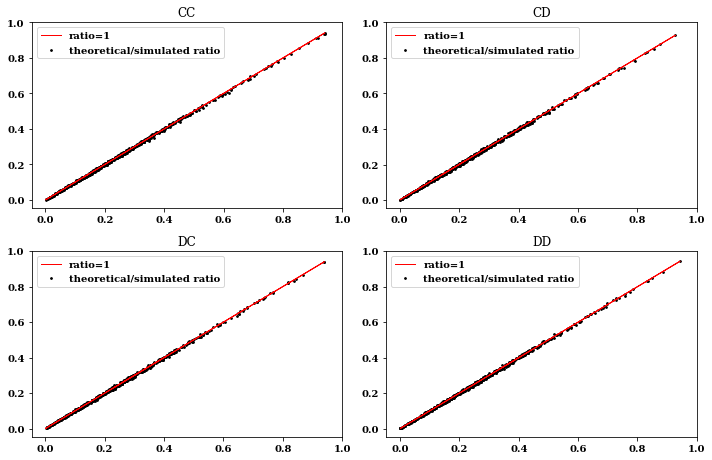

In [48]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 6.5))

i = 0 
for x_c, y_c in zip(columns[25:29], columns[-4:]):

    index = (int(i / 2), i % 2)
    
    x = df[x_c].values
    y = df[y_c].values
    
    m, b = np.polyfit(x, y, 1)
    axes[index].plot(x, m * x + b, color='red', linewidth=1, label='ratio=1')
    
    axes[index].scatter(x, y, s=3, color='black', label='theoretical/simulated ratio')
    axes[index].title.set_text(f"{labels[i]}");
    
    axes[index].set_xticks(np.linspace(0, 1, 6))
    axes[index].set_yticks(np.linspace(0, 1, 6)) 
    axes[index].legend();

    i += 1
fig.tight_layout();

In [14]:
cmaps = matplotlib.cm.get_cmap("Blues")

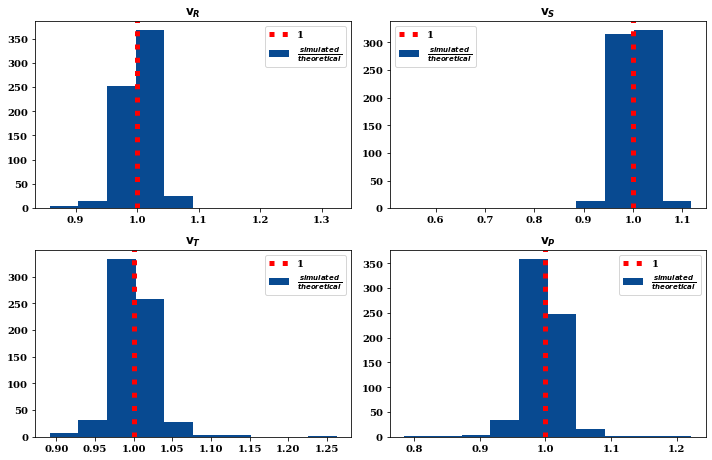

In [44]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 6.5))

i = 0 
for x_c, y_c in zip(columns[25:29], columns[-4:]):

    index = (int(i / 2), i % 2)
    
    x = df[x_c].values
    y = df[y_c].values
    
    axes[index].hist(y / x,  color=cmaps(0.9), label=r'$\frac{simulated}{theoretical}$')
    axes[index].title.set_text(f"{labels[i]}");
    axes[index].axvline(x=1, color='r', linestyle=':', linewidth=5, label='1')
    
    axes[index].legend();

    i += 1
fig.tight_layout();

plt.savefig('../static/stationary_four.pdf', bbox_inches='tight')

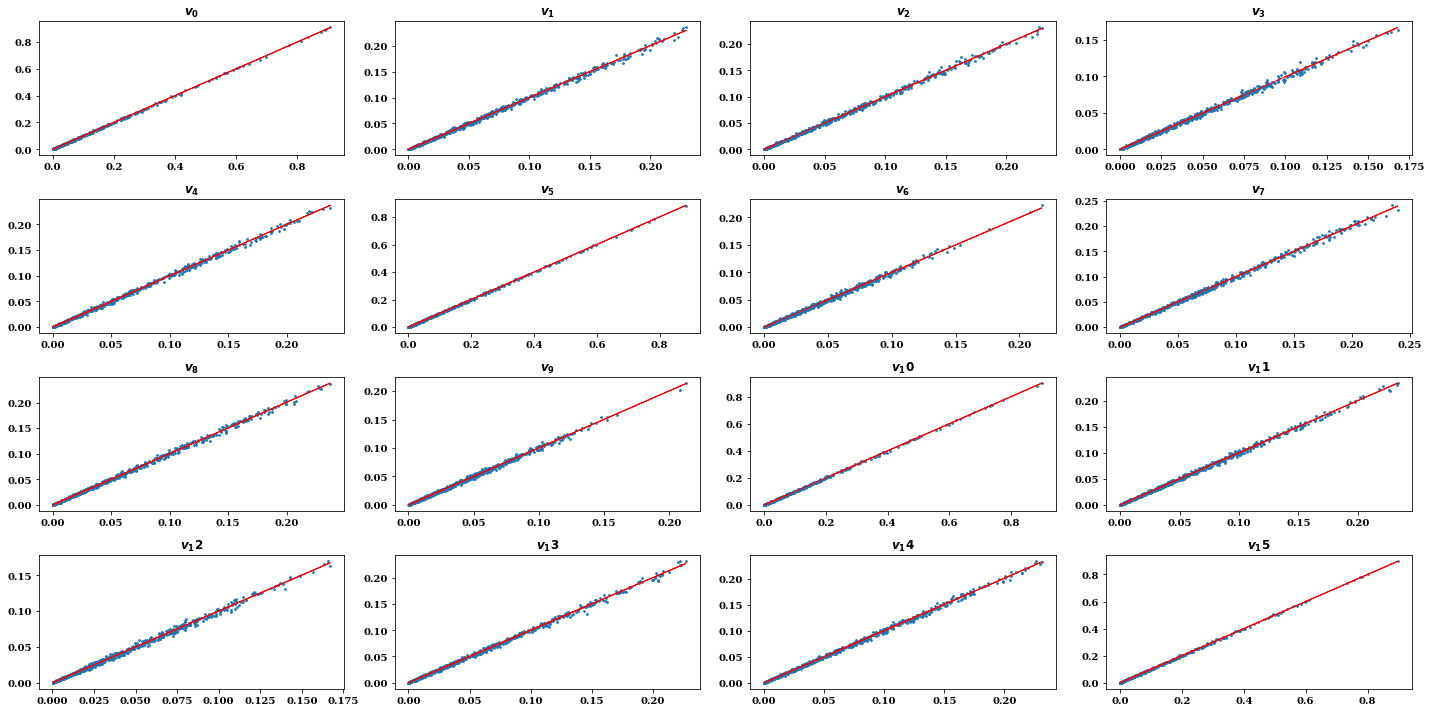

In [18]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))


i = 0 
for x_c, y_c in zip(columns[9:25], columns[29:-4]):

    index = (int(i / 4), i % 4)
    
    x = df[x_c].values
    y = df[y_c].values
    
    m, b = np.polyfit(x, y, 1)
    axes[index].plot(x, m * x + b, color='red', linewidth=1,)
    
    axes[index].scatter(x, y, s=3)
    axes[index].title.set_text(f"$v_{i}$");
    

    i += 1
fig.tight_layout()

In [45]:
labels_sixteen = [r"$\mathbf{v}_{RR}$", r"$\mathbf{v}_{RS}$", r"$\mathbf{v}_{RT}$", r"$\mathbf{v}_{RP}$",
                  r"$\mathbf{v}_{SR}$", r"$\mathbf{v}_{SS}$", r"$\mathbf{v}_{ST}$", r"$\mathbf{v}_{SP}$",
                  r"$\mathbf{v}_{TR}$", r"$\mathbf{v}_{TS}$", r"$\mathbf{v}_{TT}$", r"$\mathbf{v}_{TP}$",
                  r"$\mathbf{v}_{PR}$", r"$\mathbf{v}_{PS}$", r"$\mathbf{v}_{PT}$", r"$\mathbf{v}_{PP}$"]

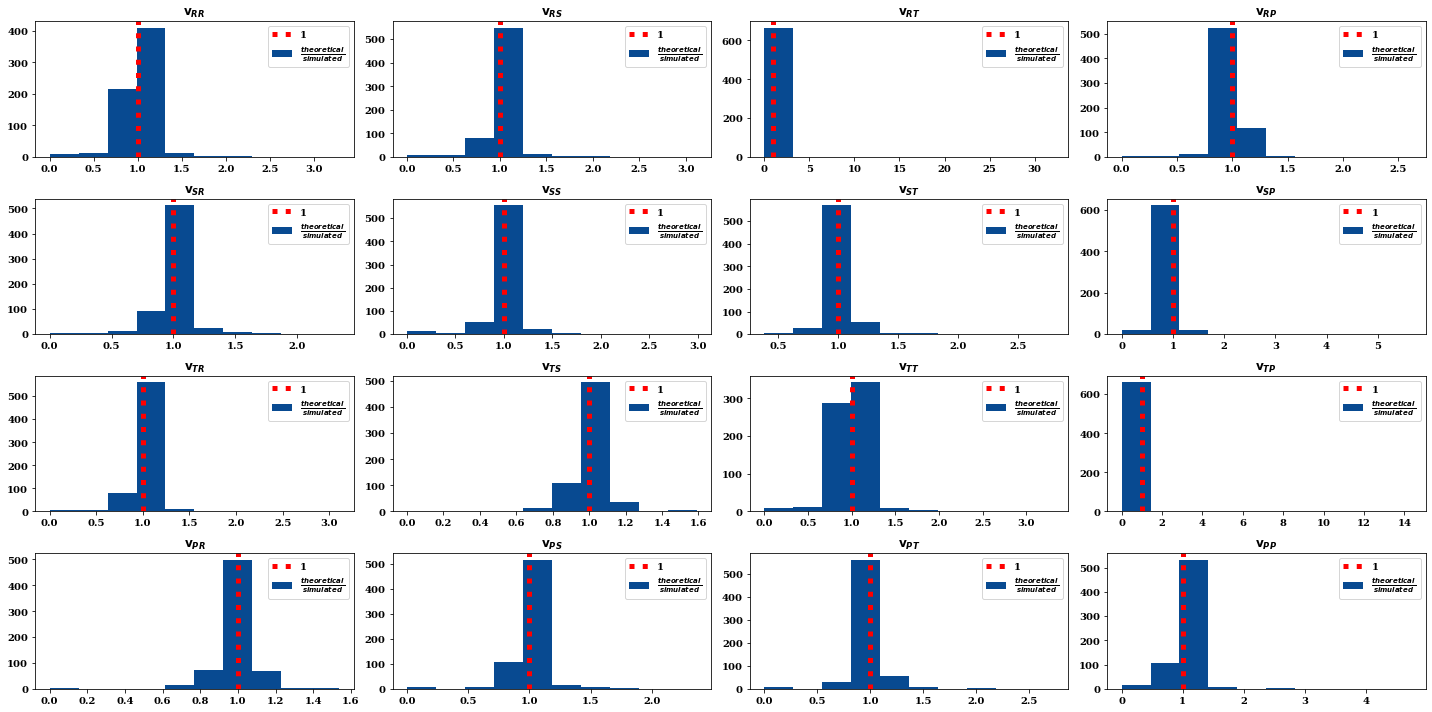

In [47]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))

i = 0 
for x_c, y_c in zip(columns[9:25], columns[29:-4]):

    index = (int(i / 4), i % 4)
    
    x = df[x_c].values
    y = df[y_c].values
    
    axes[index].hist(y/ x,  color=cmaps(0.9), label=r'$\frac{theoretical}{simulated}$')
    axes[index].title.set_text(f"{labels_sixteen[i]}");
    axes[index].axvline(x=1, color='r', linestyle=':', linewidth=5, label='1')
    
    axes[index].legend();

    i += 1
fig.tight_layout();

plt.savefig('../static/stationary_sixteen.pdf', bbox_inches='tight')

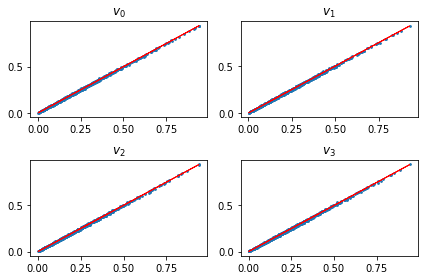

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=2)


i = 0 
for x_c, y_c in zip(columns[25:29], columns[-4:]):

    index = (int(i / 2), i % 2)
    
    x = df[x_c].values
    y = df[y_c].values
    
    m, b = np.polyfit(x, y, 1)
    axes[index].plot(x, m * x + b, color='red', linewidth=1,)
    
    axes[index].scatter(x, y, s=3)
    axes[index].title.set_text(f"$v_{i}$");
    

    i += 1
fig.tight_layout()

**Opponents**

In [48]:
import evol_dynamics

In [49]:
simulated_probabilities = evol_dynamics.get_probabilities_for_opponents(1, 100, 2, np.random.RandomState(0), 2)

In [50]:
theoretical_probabilities = evol_dynamics.theoretical_probabilities_for_opponents(100, 2)

In [51]:
columns = ["i", 
           "number_of_repetitions",
           "population_size",
           "number_of_mutants",
          ] + [f"sim-{v}" for v in simulated_probabilities.keys()] + [f"theor-{v}" for v in theoretical_probabilities.keys()] 

In [53]:
df = pd.read_csv('../data/soup_for_opponents_2.csv')

In [54]:
df.columns = columns

In [55]:
df.head()

,i,number_of_repetitions,population_size,number_of_mutants,sim-learner-role-model,sim-learner-resident-role-model-resident,sim-learner-resident-role-model-mutant,sim-learner-mutant-role-model-resident,sim-learner-mutant-role-model-mutant,sim-learner-resident-resident-role-model-resident-resident,...,theor-learner-mutant-resident-role-model-resident-resident,theor-learner-mutant-mutant-role-model-resident-resident,theor-learner-mutant-resident-role-model-resident-mutant,theor-learner-mutant-mutant-role-model-resident-mutant,theor-learner-mutant-role-model-role-model-resident-learner,theor-learner-mutant-resident-role-model-mutant-resident,theor-learner-mutant-mutant-role-model-mutant-resident,theor-learner-mutant-resident-role-model-mutant-mutant,theor-learner-mutant-mutant-role-model-mutant-mutant,theor-learner-mutant-role-model-role-model-mutant-learner
0,1,100000,136,113,0.00767,0.02599,0.13763,0.13602,0.69269,0.00079,...,0.003414,0.018085,0.019117,0.095592,0.001032,0.018085,0.095592,0.095592,0.477961,0.005206
1,2,100000,84,20,0.01221,0.58171,0.17822,0.17687,0.05099,0.33581,...,0.104303,0.030289,0.032488,0.008794,0.002198,0.030289,0.008794,0.008794,0.002373,0.000628
2,3,100000,50,48,0.02152,0.00000,0.02092,0.02016,0.93740,0.00000,...,-0.000009,0.000000,0.000434,0.019558,0.000434,0.000000,0.019558,0.019558,0.880102,0.019974
3,4,100000,146,56,0.00687,0.37591,0.23363,0.23889,0.14470,0.14074,...,0.089394,0.054862,0.056513,0.033666,0.001651,0.054862,0.033666,0.033666,0.020048,0.001002
4,5,100000,52,39,0.01928,0.05329,0.18246,0.18303,0.56194,0.00308,...,0.009124,0.030944,0.034670,0.104086,0.003724,0.030944,0.104086,0.104086,0.312257,0.011482


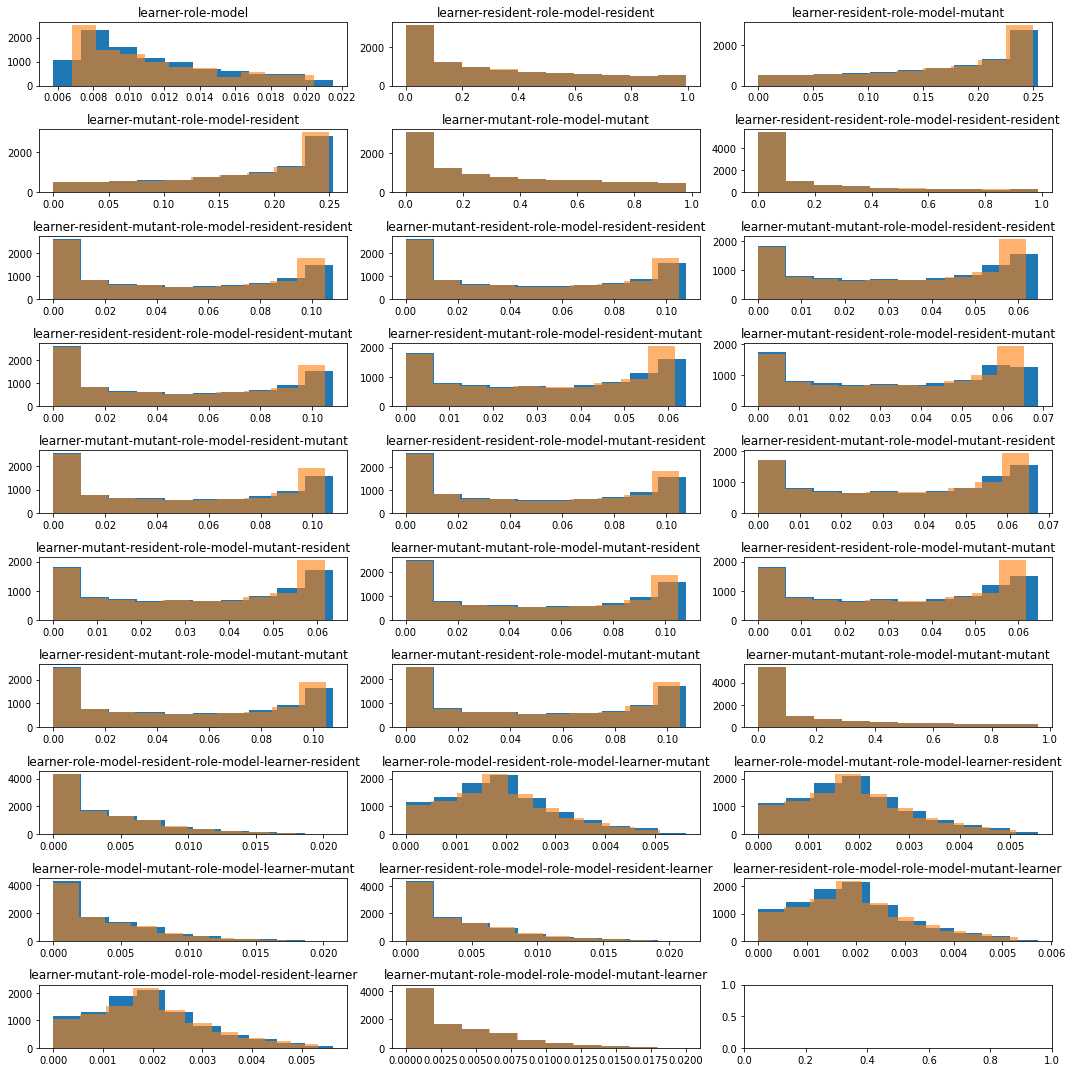

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=10, figsize=(15, 15))
 
for i, key in enumerate(simulated_probabilities.keys()):

    index = (int(i / 3), i % 3)
    
    axes[index].hist(df[f"sim-{key}"])
    axes[index].hist(df[f"theor-{key}"], alpha=0.6)
    
    axes[index].title.set_text(f"{key}");
    
fig.tight_layout()

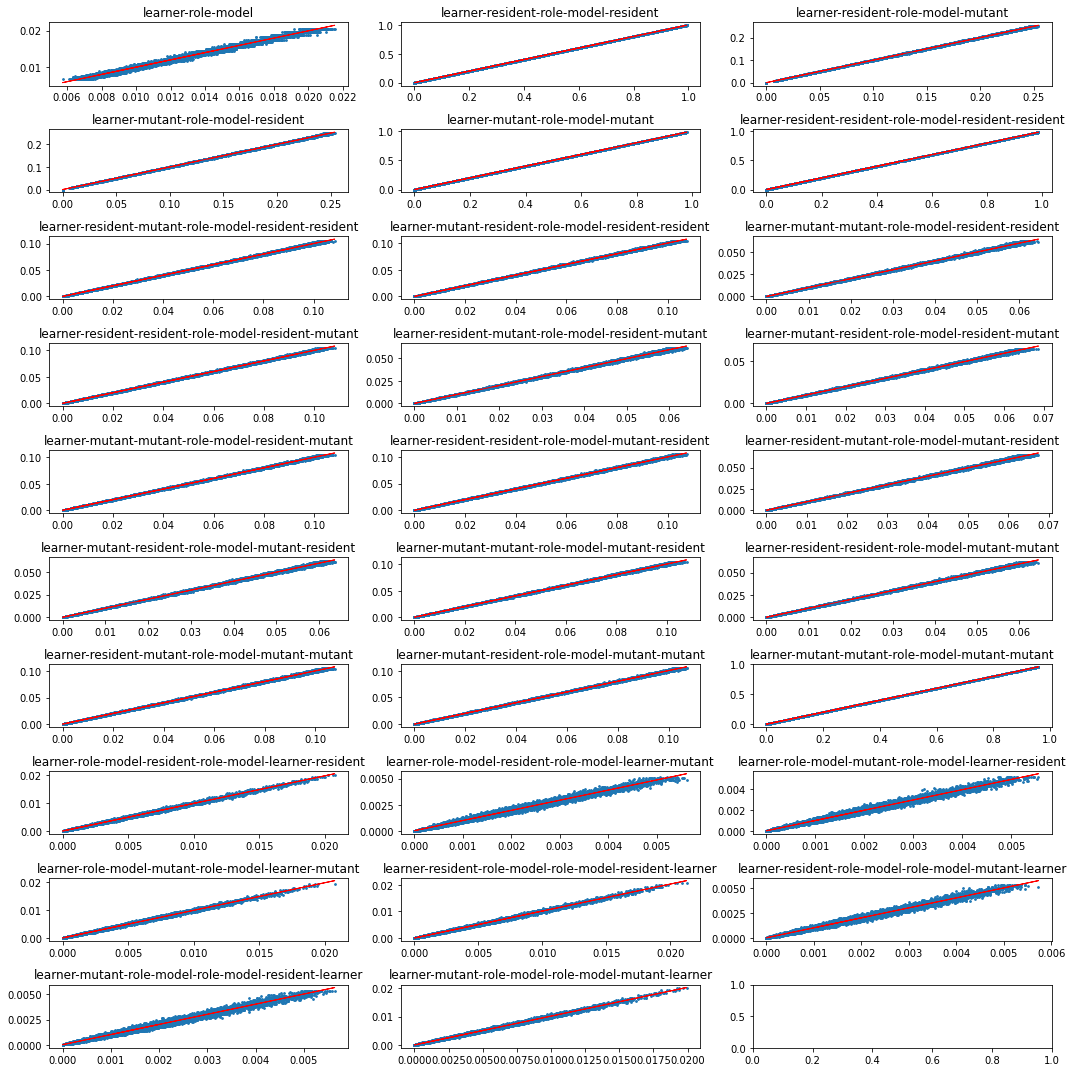

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=10, figsize=(15, 15))
 
for i, key in enumerate(simulated_probabilities.keys()):

    index = (int(i / 3), i % 3)
    
    x = df[f"sim-{key}"]
    y = df[f"theor-{key}"]

    
    m, b = np.polyfit(x, y, 1)
    axes[index].plot(x, m * x + b, color='red', linewidth=1,)
    
    axes[index].scatter(x, y, s=3)
    axes[index].title.set_text(f"{key}");
    
fig.tight_layout()